# Let's take a look at the General Service List (list of common english words) ... 2000 words or so

https://www.eapfoundation.com/vocab/general/gsl/

# Corpus of Contemporary American English (COCA) <-- sorted by frequency 
https://www.wordfrequency.info/ 
UGH i have to purchase this? booo

# Game plan...
* I want certain reactive groups to correlate with whether things are nouns or verbs.
    * I think that means I have to somehow separate out reactive vs. unreactive chemicals first.
    * Similarly separate out verbs and nouns in english (that should have a function already)
* Then I want to maybe match the most common words in each category using COCA for english and some other sort of frequency of most common chemicals...
* After frequency, let's rely on embeddings to get everything else closest to the nearest neighbor anchor point. This way we can be sure things are at least somewhat aligned.
    * alternatively we don't even start with the anchors but jump straight into the embeddings? Need to talk to David to get his help here with alignment.


* Subjunctive / conditional / other fun tenses could be inert gases that I add to the reaction like Helium could be a good example of conditional.
* Electro chemistry would be crazy... maybe that can be for a tense that is crazy... again I want to say conditional.

* Past, present, future will be decided by which side of a reaction is given. if it's in equilibrium then it's present.

I guess stoichometry is important here :^P

* One thing I wish would be that we have 

In [1]:
import pandas as pd
import ast

words_df = pd.read_csv("embedded_words.csv")

In [2]:
df = words_df[words_df['BERT_Embedding'].apply(lambda x: isinstance(x, str))]
df['BERT_Embedding'] = df['BERT_Embedding'].apply(ast.literal_eval)

/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_33890/202740815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BERT_Embedding'] = df['BERT_Embedding'].apply(ast.literal_eval)


In [3]:
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA

# Assuming df is your DataFrame and it has a column 'BERT_Embedding' containing the embeddings

# Convert the list of embeddings to a numpy array
fingerprints = np.array(df['BERT_Embedding'].tolist())

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce to 100 dimensions
pcaed_prints = pca.fit_transform(fingerprints)

# Apply UMAP to the PCA-reduced data
reducer = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(pcaed_prints)

# Add UMAP components to the DataFrame
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_33890/2077783297.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [4]:
import nbformat
import plotly.express as px

# Create an interactive Plotly scatter plot
fig = px.scatter(
    df,
    x='UMAP1',
    y='UMAP2',
    title='UMAP projection of BERT Embeddings',
    labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
    hover_name='Word',
    color_continuous_scale='plasma',
    render_mode='webgl'
)

# Show the plot
fig.show()

In [45]:
df.to_csv('playground_BERT_embeddings.csv')

# BERT embeddings

In [1]:
import pandas as pd
import torch
from transformers import BertModel, BertTokenizer


# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


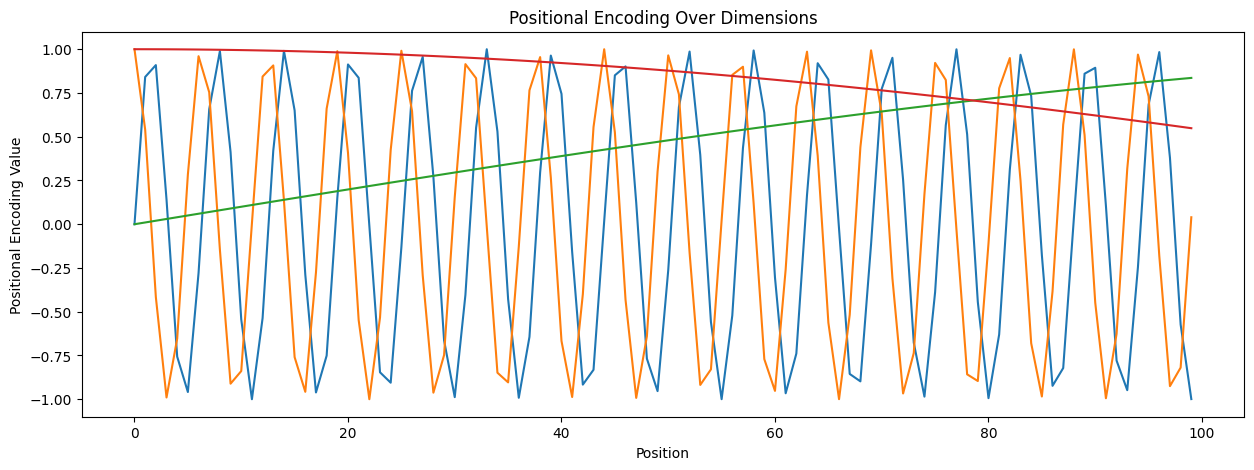

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d_model = 4  # embedding dimension
max_len = 100  # maximum sequence length

# Initialize positional encoding matrix
pe = np.zeros((max_len, d_model))
position = np.arange(0, max_len, dtype=float).reshape(-1, 1)
div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

pe[:, 0::2] = np.sin(position * div_term)
pe[:, 1::2] = np.cos(position * div_term)

plt.figure(figsize=(15, 5))
plt.plot(pe)
plt.xlabel('Position')
plt.ylabel('Positional Encoding Value')
plt.title('Positional Encoding Over Dimensions')
plt.show()


In [2]:
model = BertModel.from_pretrained("bert-base-uncased")

def get_word_embeddings(words):
    inputs = tokenizer(words, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

In [29]:
# get_word_embeddings('cats').squeeze()

words_df = pd.read_csv('words.csv', index_col=0)

In [30]:
reduced_words_df = words_df[words_df['POS'] == 'Noun'][:5000]
reduced_words_df

,Word,Frequency,POS
102,he,35466,Noun
103,it,31128,Noun
104,his,28398,Noun
105,you,19684,Noun
106,i,18946,Noun
...,...,...,...
5097,usher,19,Noun
5098,governess,19,Noun
5099,quiney,19,Noun
5100,goddess,19,Noun


In [32]:
import numpy as np
from tqdm import tqdm
import os
import pdb

if os.path.exists("embedded_words.csv"):
    prev_embedded_words_df = pd.read_csv("embedded_words.csv")
    prev_embedded_words_df['BERT_Embedding'] = prev_embedded_words_df['BERT_Embedding'].apply(lambda x: eval(x) if pd.notna(x) else x)
    # Merge the existing embeddings into the main DataFrame
    words_df.update(prev_embedded_words_df)

else:
    words_df["BERT_Embedding"] = np.nan
    words_df["BERT_Embedding"] = words_df["BERT_Embedding"].astype(object)

# Ensure the BERT_Embedding column is of object type to store lists
words_df["BERT_Embedding"] = words_df["BERT_Embedding"].astype(object)

# Iterate through each row to calculate the BERT embeddings and update the DataFrame
for idx, (row_idx, row) in tqdm(
    enumerate(reduced_words_df.iterrows()),
    total=len(reduced_words_df),
):
    # Skip rows that already have embeddings
    if not pd.isna(words_df.iloc[row_idx]["BERT_Embedding"]):
        continue

    try:
        embedding = get_word_embeddings(row["Word"]).squeeze().numpy().tolist()
        words_df.at[row_idx, "BERT_Embedding"] = embedding

        # Save the DataFrame to a CSV file every 10 words
        if idx % 10 == 0:
            words_df.to_csv("embedded_words.csv", index=False)
    except Exception as e:
        print(f"Issue with {row['Word']}: {e}")

# Ensure the final DataFrame is saved
words_df.to_csv("embedded_words.csv", index=False)

  0%|          | 0/5000 [00:00<?, ?it/s]

  7%|▋         | 374/5000 [00:23<03:47, 20.34it/s]

Issue with nan: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).


100%|██████████| 5000/5000 [21:36<00:00,  3.86it/s]


In [ ]:
import numpy as np
from tqdm import tqdm
import os
import pandas as pd

def save_chunk(df_chunk, chunk_idx):
    chunk_filename = f"embedded_words_chunk_{chunk_idx}.csv"
    df_chunk.to_csv(chunk_filename, index=False)

def load_existing_embeddings():
    existing_embeddings = []
    for file in os.listdir():
        if file.startswith("embedded_words_chunk_") and file.endswith(".csv"):
            chunk_df = pd.read_csv(file)
            chunk_df['BERT_Embedding'] = chunk_df['BERT_Embedding'].apply(lambda x: eval(x) if pd.notna(x) else x)
            existing_embeddings.append(chunk_df)
    return pd.concat(existing_embeddings, ignore_index=True) if existing_embeddings else None

# Load existing embeddings if they exist
existing_df = load_existing_embeddings()

if existing_df is not None:
    words_df.update(existing_df)
else:
    words_df["BERT_Embedding"] = np.nan
    words_df["BERT_Embedding"] = words_df["BERT_Embedding"].astype(object)

# Ensure the BERT_Embedding column is of object type to store lists
words_df["BERT_Embedding"] = words_df["BERT_Embedding"].astype(object)

# Define chunk size
chunk_size = 1000  # Adjust this based on your system's memory capacity
total_chunks = len(reduced_words_df) // chunk_size + 1

# Process and save in chunks
for chunk_idx in range(total_chunks):
    start_idx = chunk_idx * chunk_size
    end_idx = min(start_idx + chunk_size, len(reduced_words_df))
    chunk_df = reduced_words_df.iloc[start_idx:end_idx].copy()

    for row_idx, row in tqdm(chunk_df.iterrows(), total=len(chunk_df), desc=f"Processing chunk {chunk_idx + 1}/{total_chunks}"):
        global_idx = row.name

        # Skip rows that already have embeddings
        if not pd.isna(words_df.at[global_idx, "BERT_Embedding"]):
            continue

        try:
            embedding = get_word_embeddings(row["Word"]).squeeze().numpy().tolist()
            words_df.at[global_idx, "BERT_Embedding"] = embedding
            chunk_df.at[global_idx, "BERT_Embedding"] = embedding
        except Exception as e:
            print(f"Issue with {row['Word']}: {e}")

    # Save the chunk after processing
    save_chunk(chunk_df, chunk_idx)

# Merge all chunk files into a single DataFrame
final_df = load_existing_embeddings()
final_df.to_csv("embedded_words.csv", index=False)


# GETTING A LIST OF WORDS (Dont need to rerun)

In [1]:
import nltk
# nltk.download('bnc')
nltk.download('brown')
nltk.download('gutenberg')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/yitongtseo/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/yitongtseo/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yitongtseo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yitongtseo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yitongtseo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# POS tag descriptions based on the Penn Treebank tag set
pos_tag_descriptions = {
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "WEIRD Adjective",
    "JJS": "WEIRD Adjective",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "Noun",
    "NNS": "WEIRDNoun",
    "NNP": "Proper Noun", # Proper Noun
    "NNPS": "WEIRDNoun",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal Noun", # Personal pronoun
    "PRP$": "Possesive Noun", # Possessive pronoun
    "RB": "Adverb",
    "RBR": "Adverb",
    "RBS": "Adverb",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb",
    "VBD": "Verb",
    "VBG": "Verb",
    "VBN": "Verb",
    "VBP": "Verb",
    "VBZ": "Verb",
    "WDT": "Wh-determiner",
    "WP": "Wh-pronoun",
    "WP$": "Possessive wh-pronoun",
    "WRB": "Wh-adverb",
    "``": "Punctuation",
    "''": "Punctuation",
    ",": "Punctuation",
    ".": "Punctuation",
    ":": "Punctuation",
    "(": "Punctuation",
    ")": "Punctuation",
    "$": "Punctuation",
    "#": "Punctuation",
}

In [3]:
from nltk.corpus import brown, gutenberg
from nltk import FreqDist, pos_tag
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import re

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to determine the lemma based on POS tag
def get_lemma(word, tag):
    # Exclude words that are entirely numeric or symbols
    if re.fullmatch(r'[\d$.,]+', word):
        return None  # Return None to indicate exclusion
    
    # Handle possessive cases
    if word.endswith("'s") or word.endswith("’s"):
        word = word[:-2]  # Remove 's
    elif word.endswith("'") or word.endswith("’"):
        word = word[:-1]  # Remove trailing apostrophe

    if tag.startswith('NN'):
        return lemmatizer.lemmatize(word, pos='n')  # for nouns
    elif tag.startswith('VB'):
        return lemmatizer.lemmatize(word, pos='v')  # for verbs
    elif tag.startswith('JJ'):
        return lemmatizer.lemmatize(word, pos='a')  # for adjectives
    elif tag.startswith('RB'):
        return lemmatizer.lemmatize(word, pos='r')  # for adverbs
    else:
        return word
    

words = [word.lower() for word in brown.words()] + [word.lower() for word in gutenberg.words()]
tagged_words = pos_tag(words)

In [4]:
tagged_lemmas = [
    (get_lemma(word, pos), pos_tag_descriptions[pos]) for (word, pos) in tagged_words
]
total_freq_dist = FreqDist(tagged_lemmas)
sorted_words_by_POS = {}
for (lemma, pos), count in total_freq_dist.items():
    sorted_words_by_POS[pos] = sorted_words_by_POS.get(pos, []) + [(lemma, count)]

for pos, word_list in sorted_words_by_POS.items():
    sorted_words_by_POS[pos] = sorted(word_list, key=lambda item: item[1], reverse=True)


In [5]:
len(sorted_words_by_POS['Noun'])

38590

In [6]:
sorted_words_by_POS['Noun'][3000:3100]

[('deficiency', 39),
 ('trustee', 39),
 ('output', 39),
 ('lecture', 39),
 ('generosity', 39),
 ('capability', 39),
 ('earnest', 39),
 ('stride', 39),
 ('contradiction', 39),
 ('straw', 39),
 ('gap', 39),
 ('spoken', 39),
 ('melody', 39),
 ('understood', 39),
 ('shakespeare', 39),
 ('sarah', 39),
 ('deceit', 39),
 ('worthy', 39),
 ('usage', 39),
 ('anyhow', 39),
 ('sinai', 39),
 ('spray', 39),
 ('pig', 39),
 ('spoon', 39),
 ('hide', 39),
 ('intercourse', 39),
 ('hang', 39),
 ('cavalry', 39),
 ('knot', 39),
 ('orphan', 39),
 ('pilate', 39),
 ('cheerfulness', 39),
 ('sprang', 39),
 ('watchman', 39),
 ('shipmate', 39),
 ('perfect', 39),
 ('musgroves', 39),
 ('ishmael', 39),
 ('merari', 39),
 ('jehoshaphat', 39),
 ('mordecai', 39),
 ('whaler', 39),
 ('downe', 39),
 ('rosin', 39),
 ('r.', 38),
 ('associate', 38),
 ('outcome', 38),
 ('latin', 38),
 ('admission', 38),
 ('graduate', 38),
 ('steward', 38),
 ('knight', 38),
 ('holder', 38),
 ('jump', 38),
 ('proprietor', 38),
 ('lace', 38),
 ('e

In [10]:
import pandas as pd 

data = []
for pos, word_list in sorted_words_by_POS.items():
    for word, frequency in word_list:
        data.append({
            'Word': word,
            'Frequency': frequency,
            'POS': pos
        })

words_df = pd.DataFrame(data)
words_df

,Word,Frequency,POS
0,the,203554,Determiner
1,a,57155,Determiner
2,this,14060,Determiner
3,all,11048,Determiner
4,an,8638,Determiner
...,...,...,...
81705,banner,1,Symbol
81706,non,1,Symbol
81707,shakspere,1,Symbol
81708,oak,1,Symbol


In [11]:
words_df.to_csv('words.csv')

In [13]:
words_df[words_df['POS'] == 'Noun']


,Word,Frequency,POS
102,he,35466,Noun
103,it,31128,Noun
104,his,28398,Noun
105,you,19684,Noun
106,i,18946,Noun
...,...,...,...
38687,estray,1,Noun
38688,gluttony,1,Noun
38689,dissolute,1,Noun
38690,shopfront,1,Noun
